## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [143]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [144]:
df = pd.read_csv('DATA/ab_data.csv')
df.head(8)

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1
5   936923  2017-01-10 15:20:49.083499    control     old_page          0
6   679687  2017-01-19 03:26:46.940749  treatment     new_page          1
7   719014  2017-01-17 01:48:29.539573    control     old_page          0

b. Use the below cell to find the number of rows in the dataset.

In [145]:
print('Number of rows = {}'.format(df.shape[0]))

Number of rows = 294478


c. The number of unique users in the dataset.

In [146]:
print('Number of unique users = {}'.format(df['user_id'].nunique()))

Number of unique users = 290584


d. The proportion of users converted.

In [147]:
print('Proportion of users converted = {}'.format(df['converted'].mean()))

Proportion of users converted = 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [148]:
print("Number of times the new_page and treatment don't line up  = {}".format(df.query('(group == "treatment" and landing_page == "old_page") or (group != "treatment" and landing_page == "new_page")').shape[0]))

Number of times the new_page and treatment don't line up  = 3893


f. Do any of the rows have missing values?

In [149]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [150]:
df2 = df[(df['group'] == 'treatment') & (df['landing_page'] =='new_page')].append(df[(df['group'] == 'control') & (df['landing_page'] =='old_page')])

#for checking; it works if the last line 'df2.head(3)' is deleted; apparently the '.head' and '.tail' functions works only if they are the last lines executed.
df2.tail(8) 
df2.head(8)

user_id                   timestamp      group landing_page  converted
2    661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3    853541  2017-01-08 18:28:03.143765  treatment     new_page          0
6    679687  2017-01-19 03:26:46.940749  treatment     new_page          1
8    817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9    839785  2017-01-15 18:11:06.610965  treatment     new_page          1
10   929503  2017-01-18 05:37:11.527370  treatment     new_page          0
11   834487  2017-01-21 22:37:47.774891  treatment     new_page          0
12   803683  2017-01-09 06:05:16.222706  treatment     new_page          0

In [151]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [152]:
print('Number of unique users = {}'.format(df2['user_id'].nunique()))

Number of unique users = 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [153]:
df2[df2.duplicated(['user_id'],keep= False)]

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

c. What is the row information for the repeat **user_id**? 

In [154]:
df2[df2.duplicated(['user_id'],keep= False)]

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [155]:
df2.drop_duplicates(['user_id'],inplace=True)
df2.query('user_id == "773192"')
df2['user_id'].count()

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [156]:
print('Probability of an individual converting = {}'.format(df.converted.mean())) 

Probability of an individual converting = 0.11965919355605512


b. Given that an individual was in the `control` group, what is the probability they converted?

In [157]:
print('Individual in control group converting probability = {}'.format(df2.query('group == "control"').converted.mean())) 

Individual in control group converting probability = 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [158]:
print('Individual in treatment group converting probability = {}'.format(df2.query('group == "treatment"').converted.mean()))

Individual in treatment group converting probability = 0.11880806551510564


d. What is the probability that an individual received the new page?

In [159]:
print('Individual receiving the new page probability = {}'.format(df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]))

Individual receiving the new page probability = 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

> #### It seems like too close to call ; the propality of converting for the control group and the treatment group are similar if rounded to two decimal points (0.12) with a slight increase if the indvidual is from the control group . inconclusive evidence i would say.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>**$Null : H_{0} : p_{new}  \le p_{old} $**

>**$Alternative : H_{1} : p_{new} > p_{old} $**

>$\alpha$  =  0.05

>Null: conversion rate is the same whether the visitor lands on new or old page or conversion rate for landing on the old is higher.

>Alternative: conversion rate is higher if the visitor lands on the new page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [160]:
p_new = df2.converted.mean()
print(' Pnew = {}'.format(p_new))

 Pnew = 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [161]:
p_old = df2.converted.mean()
print('Pold = {}'.format(p_old))

Pold = 0.11959708724499628


c. What is $n_{new}$?

In [162]:
n_new = df2.query("landing_page == 'new_page'").count()[0]
print('Nnew = {}'.format(n_new))

Nnew = 145310


d. What is $n_{old}$?

In [163]:
n_old = df2.query("landing_page == 'old_page'").count()[0]
print('Nold = {}'.format(n_old))

Nold = 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [164]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [165]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [166]:
fnd = new_page_converted.mean() - old_page_converted.mean()
print('Pnew - Pold for simulated = {}'.format(fnd))

Pnew - Pold for simulated = 0.000665670226075013


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [167]:
ncnvsml = np.random.binomial(n_new, p_new, 10000)/n_new
ocnvsml = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = ncnvsml - ocnvsml

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   6.,   67.,  442., 1517., 2884., 2947., 1566.,  479.,   85.,
           7.]),
 array([-4.90950261e-03, -3.93010012e-03, -2.95069764e-03, -1.97129516e-03,
        -9.91892674e-04, -1.24901912e-05,  9.66912292e-04,  1.94631478e-03,
         2.92571726e-03,  3.90511974e-03,  4.88452222e-03]),
 <a list of 10 Patch objects>)

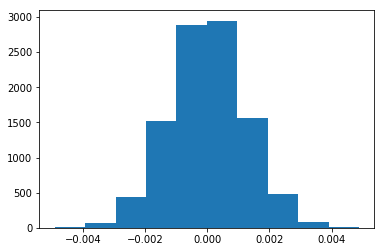

In [168]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [169]:
actprp = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
actprp
p_diffs = np.array(p_diffs)
p_diffs

print('Proportion of Actual Differnce = {}'.format(actprp))
print('Proportion of Higher = {}'.format((actprp < p_diffs).mean()))

Proportion of Actual Differnce = -0.0015782389853555567
Proportion of Higher = 0.9063


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>**What I calculated in part j is $P_{VALUE}$:**

>**since $P_{VALUE}$ > 0.05 ($\alpha$), it proves that I failed to reject the Null hypothesis which means the conversion rate for landing on the Old Page is equal or higher than the New Page landing conversion.**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [170]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [171]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')

z_score = round(z_score, 2)
p_value = round(p_value, 2)

print("Zscore = {}".format(z_score))
print("Pvalue = {}".format(p_value))

Zscore = 1.31
Pvalue = 0.91


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>**If the $P_{VALUE}$ were less than 0.05 then we would've called it significant but since it is higher then we can say the NULL hypothesis is true.**

>**$Z_{SCORE}$ is less than the significant score of 1.65(1.6448536269514722) also prove the Null hypothesis is true.**

>**Null hypothesis is ture means the landing on old conversion rate is similar - and actually over here just slightly higher - than the conversion rate of landing on the new page.**

>**The findings are in agreement with part j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression Model.**
>Since it is binary (0 : no conversion, 1 : conversion ) then the logistic regression model is ideal to use.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [172]:
import statsmodels.api as sm

df3 = df2

In [173]:
df3['intercept']= 1
df3[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df3.drop('old_page', axis=1, inplace=True)
df3.head()

user_id                   timestamp      group landing_page  converted  \
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
6   679687  2017-01-19 03:26:46.940749  treatment     new_page          1   
8   817355  2017-01-04 17:58:08.979471  treatment     new_page          1   
9   839785  2017-01-15 18:11:06.610965  treatment     new_page          1   

   intercept  ab_page  
2          1        1  
3          1        1  
6          1        1  
8          1        1  
9          1        1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [174]:
import statsmodels.api as sm
rsl = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [175]:
rsl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        19:15:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

> ab_page $P_{VALUE}$ = 0.19 

> ####  Part.2 $P_{VALUE} = 0.91$  >  Part.3 $P_{VALUE} = 0.19$

>In an A/B Test, it is a one sided model test where in Logistic Regression is a two sided model test.

> A Logistic Regression follows this hypothesis for testing : 

>**$Null : H_{0} : p_{new}  = p_{old}$**

>**$Alternative : H_{1} : p_{new} \neq p_{old}$**.

> In the A/B test we were trying to prove that landing on new page may lead to a higher conversion rate but here (Logistic Regression) we are just trying to prove wether they are equal or not equal.

> In short; the hypothesis for null here is different from the one in part 2

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> **Since landing on new or old page A/B seems to show no significant difference it would be good idea to check for other variables that may show us significant findings :**

>**If we to abide to the used .csv: then it is a good idea to consider other variables like the timestamp; since what time of the day they landed on the page might have influence.** 

>**Other variables that are not provided in the used .csv could be age, sex, device used to log in etc. can be utitlised to check if they make a difference if provided.**

>**Disadvantages i would say multicollinearity; adding too many independant varibales or irrelevant variables might cause any findings/insights we get insignificant & uselss.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [176]:
cntr = pd.read_csv('DATA/countries.csv')
df4 = cntr.set_index('user_id').join(df3.set_index('user_id'), how='inner')

In [177]:
df4.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  
user_id                                 
834778           0          1        0  
928468           0          1        1  
822059           1          1        1  
711597           0          1        0  
710616           0          1        1

In [178]:
df4[['CA', 'UK']] = pd.get_dummies(df4['country'])[['CA','UK']]

df4['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [179]:
smmrsl = sm.Logit(df4['converted'], df4[['ab_page','intercept', 'CA', 'UK']])
rsl = smmrsl.fit()
rsl.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        19:15:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [180]:
print('CA exponential value = {}'.format(1/np.exp(-0.0408)))
print('UK exponential value = {}'.format(np.exp(0.0099)))

CA exponential value = 1.0416437559600236
UK exponential value = 1.0099491671175422


> #### There seems to be no significant differenct in the conversion rate even when comparing between countries; 

> Canadians are 1.04 more times likely to convert compared to the US or have 4% conversion rate.

>British are 1.01 more times likely to convert comapred to the US or 1% more conversion rate.

In [181]:
df4['CA_ab_page'] = df4['ab_page']*df4['CA']
df4['UK_ab_page'] = df4['ab_page']*df4['UK']
df4.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  CA  UK  CA_ab_page  UK_ab_page  
user_id                                                                 
834778           0          1        0   0   1           0           0  
928468           0          1        1   0   0           0           0  
822059           1          1        1   0   1           0           1  
711597           0          1        0   0   1           0           0  
710616           0          1        1   0   1           0           1

In [182]:
lgmd = sm.Logit(df4['converted'], df4[['intercept','ab_page','CA_ab_page','UK_ab_page']])
rsl2 = lgmd.fit()
rsl2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Dec 2018   Pseudo R-squ.:               3.351e-05
Time:                        19:15:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0183      0.013     -1.449      0.147      -0.043       0.006
CA_ab_page    -0.0644      0.038     -1.679      0.093      -0.140       0.011
UK_ab_page     0.0257      0.019      1.363      0.173      -0.011       0.063
==============================================================================
"""

> CA_ab_page $P_{VALUE}$ = 0.093 & UK_ab_page = 0.173 both are larger than 0.05; so the country a user comes from seems to have no significant effect.

<a id='conclusions'></a>
## Conclusions

> ## Performing the A\B Test and the logistic regression yielded no significant finding that would recommend changing the old page to a new page; if anything the old page had a slight higher conversion rate but insiginificant.
